<a href="https://colab.research.google.com/github/sjkchang/CMPE255-Assignment3/blob/master/KDD_Credit_Fraudd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Selection


In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
 3D-Print-Anomoly-Detection/
 Amazon-stock-time-series.csv
 CAD.csv
 CarPrice_Assignment.csv
 CoronaryArteryDisease.csv
 creditcard.csv
'Credit Card Customer Data - Clustering.csv'
 falling-elders-anomoly-detection/
 flagged/
 Groceries_dataset-association-rules-mining.csv
 heartattack.csv
 logs.log
 machine-failure/
 Mine_Dataset.csv
 my_first_pipeline.pkl
 ny-traffic.csv
'Out-of-Sample Forecast Plot.html'
 secondhand-car-price-regression.csv
 water_potability.csv


In [2]:
import pandas as pd

# Load the dataset
creditcard_data = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataset for a quick overview
creditcard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The data has been successfully loaded and provides a snapshot of the first few transactions. Here's a brief overview:

* The Time column represents the seconds elapsed between each transaction and the first transaction in the dataset.
* Features V1 to V28 are the principal components obtained via PCA transformation. These components are already in a numerical format and have been transformed to maintain data confidentiality.
* The Amount column shows the transaction amount.
* The Class column is our target variable, where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.

# Pre-Processing

In [3]:
# Check for missing values in the dataset
missing_values = creditcard_data.isnull().sum()

# Understand the distribution of the target variable 'Class'
class_distribution = creditcard_data['Class'].value_counts(normalize=True)

# Get some descriptive statistics
data_description = creditcard_data.describe()

missing_values, class_distribution, data_description[['Amount', 'Time']].transpose()

(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,
 0    0.998273
 1    0.001727
 Name: Class, dtype: float64,
            count          mean           std  min      25%      50%  \
 Amount  284807.0     88.349619    250.120109  0.0      5.6     22.0   
 Time    284807.0  94813.859575  47488.145955  0.0  54201.5  84692.0   
 
                75%        max  
 Amount      77.165   25691.16  
 Time    139320.500  172792.00  )

* Missing Values: Fortunately, there are no missing values in our dataset. Each feature is complete.
* Class Distribution: As anticipated, there's a significant class imbalance. Approximately 99.83% of the transactions are non-fraudulent (Class = 0), and only about 0.17% are fraudulent (Class = 1). This imbalance confirms the need to use metrics like AUPRC rather than simple accuracy when evaluating our model's performance.
* Descriptive Statistics:
    1. Amount: Transactions range from $0 to about $25,691.16, with a mean transaction amount of approximately $88.35.
    2. Time: The recorded time ranges from 0 seconds to approximately 172,792 seconds (or about 48 hours, which matches the two-day data collection period). The median time is around 84,692 seconds.

We've completed the Data Pre-Processing/Cleaning step by checking for missing values, understanding the target variable's distribution, and reviewing some descriptive statistics.

# Data Transformation

Much of our dataset had already been throught the data transformation phase prior to recieving it so the sensitive information would be anonymized.   

* Feature Scaling: While the PCA components (V1 to V28) are likely already scaled, the features 'Time' and 'Amount' are not. To ensure that our model does not unduly prioritize one feature over others because of its scale, we need to standardize these features.
* Dataset Splitting: We need to split the dataset into training and testing sets. This will allow us to train our model on one subset of the data and then evaluate its performance on a separate subset that it hasn't seen before.

In [4]:
from sklearn.preprocessing import StandardScaler

# Apply standard scaling to 'Time' and 'Amount'
scaler = StandardScaler()
creditcard_data['scaled_amount'] = scaler.fit_transform(creditcard_data['Amount'].values.reshape(-1, 1))
creditcard_data['scaled_time'] = scaler.fit_transform(creditcard_data['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
creditcard_data = creditcard_data.drop(['Time', 'Amount'], axis=1)

# Rearrange the columns so 'scaled_time' and 'scaled_amount' appear at the beginning
columns = ['scaled_time', 'scaled_amount'] + [col for col in creditcard_data if col not in ['scaled_time', 'scaled_amount']]
creditcard_data = creditcard_data[columns]

# Show the first few rows of the transformed data
creditcard_data.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.996583,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-1.996583,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.996562,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-1.996562,0.140534,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.996541,-0.073403,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


**Split Dataset**

In [5]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target (y)
X = creditcard_data.drop('Class', axis=1)
y = creditcard_data['Class']

# Split the dataset into training (80%) and testing (20%) subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227845, 30), (56962, 30), (227845,), (56962,))

The dataset has been successfully split into training and testing subsets:

    Training features (X_train): 227,845 samples with 30 features each.
    Testing features (X_test): 56,962 samples with 30 features each.
    Training target (y_train): 227,845 samples.
    Testing target (y_test): 56,962 samples.

Our dataset is now ready for modeling. The features were appropriately scaled, and we had distinct training and testing sets to build and evaluate our models.

# Model

In this step, we will focus on building a baseline classifier to detect fraudulent transactions. Given the class imbalance and the nature of the data, I'll start with a logistic regression model. Logistic regression is simple, interpretable, and often serves as a good baseline. Because of it's simplicity I expect that it will not have the best performace. As such this model will serve as a baseline to compare against more complicated models.



**Logistic Regression**

In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train a logistic regression classifier
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict the probabilities of fraud on the testing data
y_pred_prob = logreg.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome (fraud)

y_pred_prob[:5]  # Display the first few predicted probabilities for clarity


array([3.75004846e-05, 3.94716550e-05, 6.17423000e-07, 1.16647171e-04,
       9.60652704e-03])

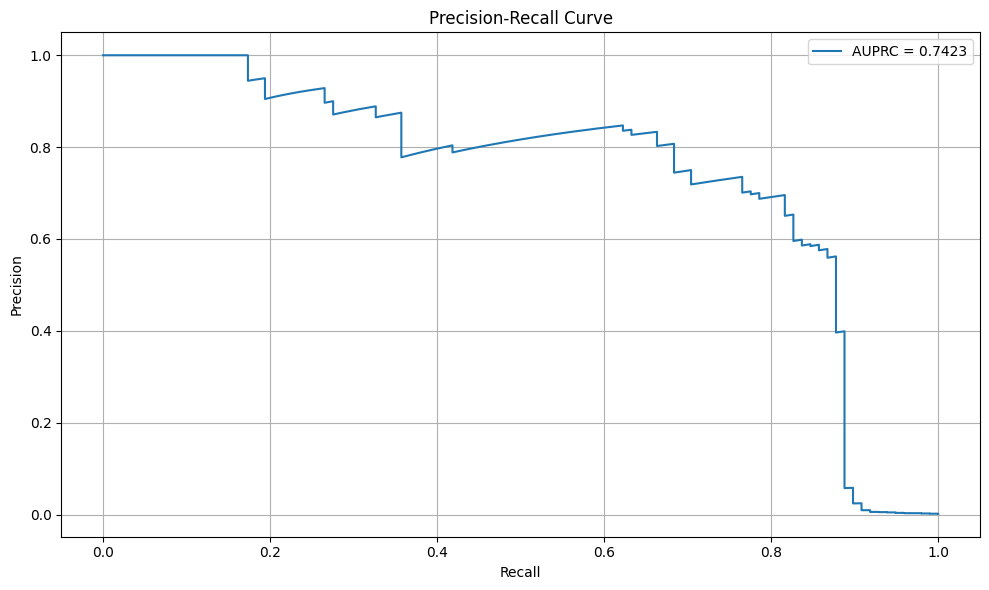

0.7423150800032507

In [7]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Compute the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)

# Compute the area under the precision-recall curve
auprc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

auprc


The Precision-Recall curve has been visualized, and the Area Under the Precision-Recall Curve (AUPRC) for our logistic regression model is approximately 0.7423. This is a reasonable starting point, especially for a baseline model on such an imbalanced dataset.

**Random Forest**

In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predict the probabilities of fraud on the testing data
y_pred_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome (fraud)

# Compute the precision-recall curve and AUPRC for the Random Forest model
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_prob_rf)
auprc_rf = auc(recall_rf, precision_rf)

auprc_rf

0.8774439458263219

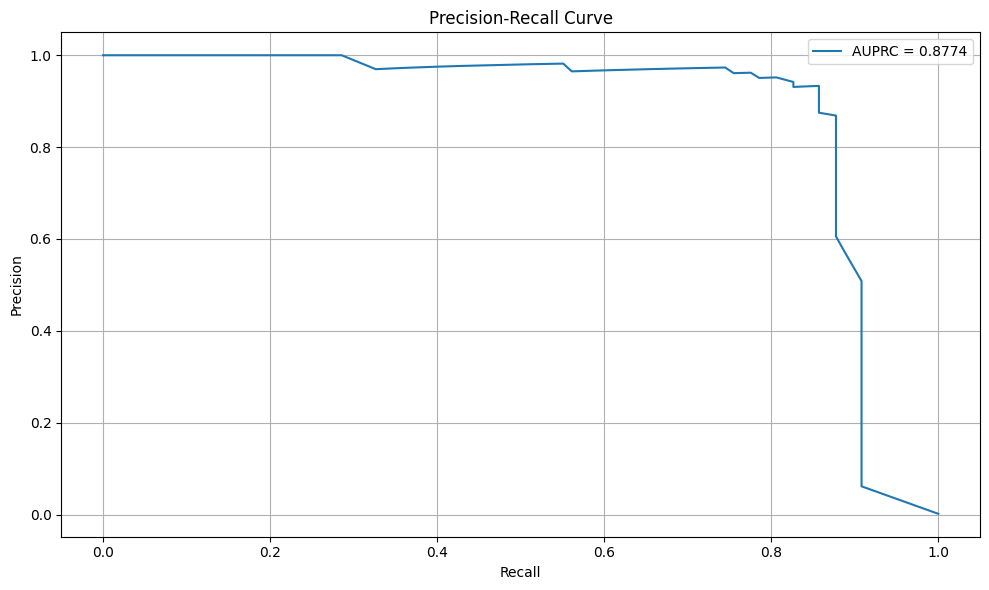

AUPRC: 0.8774


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming y_test is your test dataset labels and y_pred_prob_rf is the predicted probabilities from the Random Forest
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_rf)

# Compute the AUPRC
auprc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'AUPRC: {auprc:.4f}')


 The Area Under the Precision-Recall Curve (AUPRC) for our logistic regression model is approximately 0.8774. An AUPRC of approximately 0.8774 for the Random Forest classifier is quite impressive, especially given the challenge of the class imbalance. It demonstrates that the Random Forest model is significantly better than our initial logistic regression baseline, which had an AUPRC of about 0.7423.

**XGBoost**

In [10]:
import xgboost as xgb

# Initialize and train an XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, seed=42, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)

# Predict the probabilities of fraud on the testing data
y_pred_prob_xgb = xgb_classifier.predict_proba(X_test)[:, 1]  # probabilities for the positive outcome (fraud)

# Compute the precision-recall curve and AUPRC for the XGBoost model
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_prob_xgb)
auprc_xgb = auc(recall_xgb, precision_xgb)

auprc_xgb

0.8804268865740766

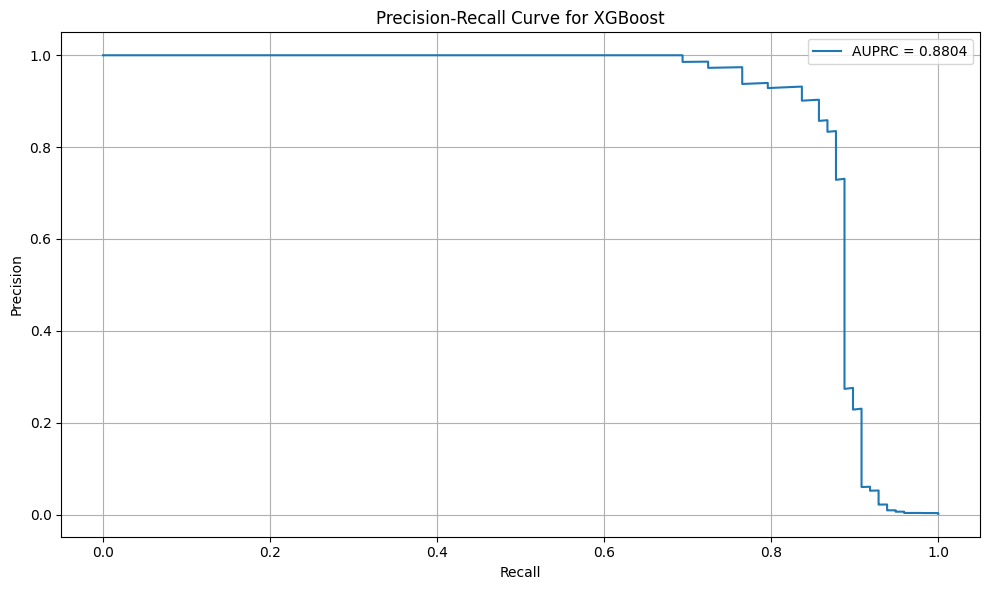

AUPRC for XGBoost: 0.8804


In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming y_test is your test dataset labels and y_pred_prob_xgb is the predicted probabilities from XGBoost
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_xgb)

# Compute the AUPRC
auprc = auc(recall, precision)

# Plot the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, label=f'AUPRC = {auprc:.4f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'AUPRC for XGBoost: {auprc:.4f}')


 The Area Under the Precision-Recall Curve (AUPRC) for our logistic regression model is approximately 0.88042. An AUPRC of approximately 0.88042 for the XGBoost classifier indicates that it's performing slightly better than the Random Forest model, which had an AUPRC of 0.87740. Both models are significantly better than our initial logistic regression baseline.

# Evaluation

**Summary**:
* Logistic Regression: AUPRC = 0.7423
* Random Forest: AUPRC = 0.87740
* XGBoost: AUPRC = 0.8804

Both the Random Forest and XGBoost models outperform the Logistic Regression baseline, with XGBoost slightly edging out the Random Forest.The small difference in AUPRC between Random Forest and XGBoost suggests that both models capture similar patterns in the data, although XGBoost might be capturing some additional nuances. **The** Logistic Regression model, while simpler, still provides a decent baseline and can be useful for understanding linear relationships in the data.

**Deployment Strategies**:

a. Batch Predictions:
* Use Case: When you need to score or classify large amounts of data at once (e.g., end-of-day processing).
* Implementation: Model predictions are made on batches of data, often stored in databases or data lakes.

b. Real-Time Predictions:
* Use Case: For real-time fraud detection where a transaction needs to be classified instantly.
* Implementation: Deploy the model using a service that can handle API requests. Services like AWS Lambda, Google Cloud Functions, or a dedicated server with Flask or FastAPI can be used.

c. Edge Deployments:
* Use Case: If the fraud detection needs to happen on a device (e.g., a credit card terminal) without reliable internet access.
* Implementation: Lightweight models or quantized models can be deployed directly onto devices.